In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

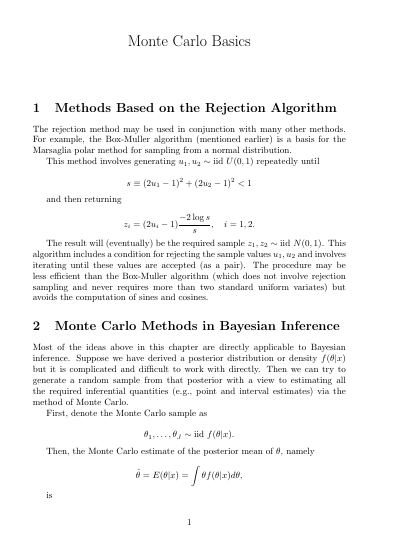

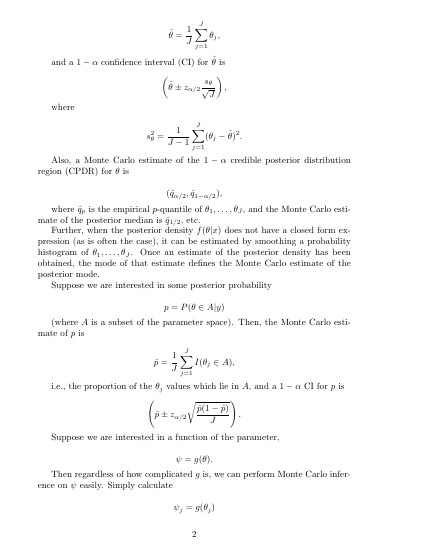

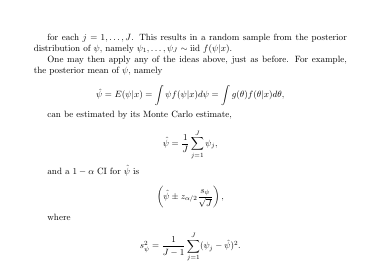

In [1]:
import math
import random

def marsaglia_polar():
    """
    Generates two independent standard normal (N(0,1)) random variables using the Marsaglia Polar Method.
    """
    while True:
        # Generate u1, u2 ~ U(0,1)
        u1 = random.uniform(0, 1)
        u2 = random.uniform(0, 1)
        
        # Calculate s = (2u1 - 1)^2 + (2u2 - 1)^2
        x = 2 * u1 - 1
        y = 2 * u2 - 1
        s = x * x + y * y
        
        if s < 1:
            # Return z1 and z2, two independent N(0,1) variables
            z1 = x * math.sqrt(-2 * math.log(s) / s)
            z2 = y * math.sqrt(-2 * math.log(s) / s)
            return z1, z2

# Example usage: generate two samples
z1, z2 = marsaglia_polar()
print(f"Generated samples: z1 = {z1}, z2 = {z2}")


Generated samples: z1 = -0.4580134259424076, z2 = -0.6206458367170546


In [2]:
import numpy as np
import scipy.stats as stats

def posterior_sampling(n_samples=1000, mu=0, sigma=1):
    """
    Perform Monte Carlo sampling from a normal posterior distribution N(mu, sigma^2).
    """
    # Generate n_samples from N(mu, sigma^2)
    samples = np.random.normal(mu, sigma, n_samples)
    return samples

def monte_carlo_estimate(samples, confidence_level=0.95):
    """
    Estimate the posterior mean, standard deviation, and confidence interval.
    """
    # Estimate mean
    mean_estimate = np.mean(samples)
    
    # Estimate standard deviation
    std_estimate = np.std(samples, ddof=1)
    
    # Calculate confidence interval
    alpha = 1 - confidence_level
    z_alpha_over_2 = stats.norm.ppf(1 - alpha / 2)
    ci_lower = mean_estimate - z_alpha_over_2 * (std_estimate / np.sqrt(len(samples)))
    ci_upper = mean_estimate + z_alpha_over_2 * (std_estimate / np.sqrt(len(samples)))
    
    return mean_estimate, std_estimate, (ci_lower, ci_upper)

# Simulate sampling from the posterior
n_samples = 1000
samples = posterior_sampling(n_samples, mu=5, sigma=2)

# Perform Monte Carlo estimation
mean_estimate, std_estimate, confidence_interval = monte_carlo_estimate(samples)

# Output results
print(f"Posterior mean estimate: {mean_estimate}")
print(f"Posterior standard deviation estimate: {std_estimate}")
print(f"95% confidence interval for the mean: {confidence_interval}")


Posterior mean estimate: 4.98862578363075
Posterior standard deviation estimate: 1.9973750661690222
95% confidence interval for the mean: (4.864829469264695, 5.112422097996806)


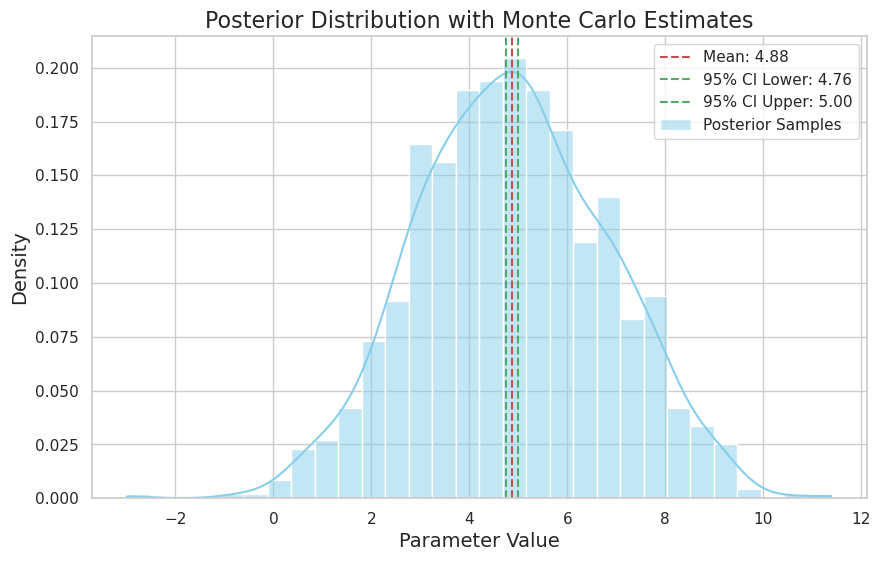

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Generate Monte Carlo samples from the posterior distribution
def posterior_sampling(n_samples=1000, mu=0, sigma=1):
    samples = np.random.normal(mu, sigma, n_samples)
    return samples

# 2. Monte Carlo estimation of mean, standard deviation, and confidence intervals
def monte_carlo_estimate(samples, confidence_level=0.95):
    mean_estimate = np.mean(samples)
    std_estimate = np.std(samples, ddof=1)
    alpha = 1 - confidence_level
    z_alpha_over_2 = stats.norm.ppf(1 - alpha / 2)
    ci_lower = mean_estimate - z_alpha_over_2 * (std_estimate / np.sqrt(len(samples)))
    ci_upper = mean_estimate + z_alpha_over_2 * (std_estimate / np.sqrt(len(samples)))
    return mean_estimate, std_estimate, (ci_lower, ci_upper)

# Simulate sampling from the posterior
n_samples = 1000
samples = posterior_sampling(n_samples, mu=5, sigma=2)

# Perform Monte Carlo estimation
mean_estimate, std_estimate, confidence_interval = monte_carlo_estimate(samples)

# 3. Plotting the Histogram and Density Plot with Seaborn

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
sns.histplot(samples, kde=True, color='skyblue', stat='density', bins=30, label="Posterior Samples")
plt.axvline(mean_estimate, color='r', linestyle='--', label=f'Mean: {mean_estimate:.2f}')
plt.axvline(confidence_interval[0], color='g', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='g', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.2f}')

# Add labels and title
plt.title('Posterior Distribution with Monte Carlo Estimates', fontsize=16)
plt.xlabel('Parameter Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show the plot
plt.show()
